<img src="https://i.ibb.co/DWSqtc1/Encabezado.png" alt="descargar" border="0" width=900px>

# **TITANIC - MACHINE LEARNING FROM DISASTE**

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/3136/logos/header.png" alt="descargar" border="0" height=200px>

> **LINK DEL CHALLENGE:** 
>
> https://www.kaggle.com/c/titanic/data

---
> **DATA:** 
>
> Los datos se han dividido en dos grupos:
- Conjunto de entrenamiento (train.csv)
- Conjunto de prueba (test.csv)

## COMPRENSIÓN DEL RETO

**CONTEXTO** 🛳️

El hundimiento del Titanic es uno de los naufragios más infames de la historia.

El 15 de abril de 1912, durante su viaje inaugural, el RMS Titanic, ampliamente considerado "insumergible", se hundió después de chocar con un iceberg. Desafortunadamente, no había suficientes botes salvavidas para todos a bordo, lo que resultó en la muerte de 1502 de los 2224 pasajeros y la tripulación.

Si bien hubo algún elemento de suerte involucrado en sobrevivir, parece que algunos grupos de personas tenían más probabilidades de sobrevivir que otros.

## IMPORTACION DE LIBRERIAS

In [1]:
# Importando librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
warnings.filterwarnings("ignore")
%matplotlib inline

## RECOPILACIÓN DE LOS DATOS

In [2]:
# Importamos los datos desde el repositorio
titanic = pd.read_csv("https://raw.githubusercontent.com/MayumyCH/dsfem_datachallenge_monthly/main/titanic_machine_learning_from_disaster/data/train.csv")

In [4]:
# Visualizamos 5 filas del titanic
# .sample(5) es 5 filas al azar
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0,B96 B98,S
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5,F33,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
658,659,0,2,"Eitemiller, Mr. George Floyd",male,23.0,0,0,29751,13.0,NaN,S
728,729,0,2,"Bryhl, Mr. Kurt Arnold Gottfrid",male,25.0,1,0,236853,26.0,NaN,S


In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## DESCRIPCION DE LOS DATOS

In [6]:
titanic.shape

# INTERPRETACION:
# 891 observaciones
# 12 features/variables

(891, 12)

In [7]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**INFORMACIÓN ACERCA DE LA DATA "train"**

El dataset cuenta con 12 variables que se detallaran a continuación:

|Variable|Variable Es| Definicion  | Llave |
|--|--|--|--|
| **PassengerId**|**IdPasajero**|	Id asignado a cada pasajero	|
| **Survived**|**Sobrevivio**|	Sobrevivencia	| 0 = No Sobrevivió, 1 = Sobrevivió
| **Pclass**|**Clase**|	La clase en la que estaba el pasajero	| 1 = Alto, 2 = Medio, 3 = Bajo
| **Name**|**Nombre**|	Nombre del pasajero	|
| **Sex**|**Genero**|	Genero del pasajero	|
| **Age**|**Edad**|	Edad del pasajero | 
| **SibSp**|**HermEsp**|	# de hermanos / cónyuges a bordo del Titanic	|
| **Parch**|**PadresHijos**|	# de padres / hijos a bordo del Titanic	|
| **Ticket**|**Tiquete**|	# del tiquete del pasajero	|
| **Fare**|**Precio**|	Precio del tiquete	|
| **Cabin**|**Cabina**|	Número de cabina en qué estaba ubicado el pasajero	|
| **Embarked**|**Embarque**|	Puerto de embarque (lugar) |	C = Cherburgo, Q = Queenstown, S = Southampton

#**RETO A RESOLVER!** 🔥

> **¿Cuál es la tasa de supervivencia por GÉNERO, CLASE Y EMBARQUE?**
> 
> Acompaña tu respuesta con un grafico



# **RESOLUCIÓN**

In [8]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Nombrar nuestra dataFrame y luego visualizarlo
titanic.columns.name = "DATOS DEL TITANIC"
titanic.index.name = "Pasajero"
titanic.head(5)

DATOS DEL TITANIC,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pasajero,,,,,,,,,,,,
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Conclusiones**

> * Ticket tiene una mezcla de datos numéricos y  alfanumericos.
* Cabin es alfanumerico

In [10]:
# Vamos a RENOMBRAR las COLUMNAS, para traducirlas al español
esp_colum ={'PassengerId':'IdPasajero','Survived':'Sobrevivio','Pclass':'Clase',\
           'Name':'Nombre','Sex':'Genero','Age':'Edad','SibSp':'HermEsp','Parch':'PadresHijos',\
           'Ticket':'Tiquete','Fare':'Precio','Cabin':'Cabina','Embarked':'Embarque'}
titanic.rename(columns=esp_colum,inplace=True)

In [11]:
titanic.tail(3)

DATOS DEL TITANIC,IdPasajero,Sobrevivio,Clase,Nombre,Genero,Edad,HermEsp,PadresHijos,Tiquete,Precio,Cabina,Embarque
Pasajero,,,,,,,,,,,,
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [12]:
print(titanic.shape) # nro de casos, nro de columnas
nro_casos = titanic.shape[0]
print(f'Número de casos: {nro_casos}')

(891, 12)
Número de casos: 891


In [13]:
# Informacion que nos proporciona nuestro dataset
titanic.info()

# -- OBSERVACIONES
# Se observa que se tiene 3 variables con datos faltantes: Edad, Cabina, Embarque.
# 5 campos enteros
# 2 campos decimales (float)
# 5 campos strings (object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IdPasajero   891 non-null    int64  
 1   Sobrevivio   891 non-null    int64  
 2   Clase        891 non-null    int64  
 3   Nombre       891 non-null    object 
 4   Genero       891 non-null    object 
 5   Edad         714 non-null    float64
 6   HermEsp      891 non-null    int64  
 7   PadresHijos  891 non-null    int64  
 8   Tiquete      891 non-null    object 
 9   Precio       891 non-null    float64
 10  Cabina       204 non-null    object 
 11  Embarque     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**LA NATURALEZA DE LAS VARIABLES**

| CATEGORICO          | CATEGORICO                      | NUMERICO        |  NUMERICO                   |   |
|----------------------|----------------------|---------------------|---------------------|---|
| **NOMINAL** | **ORDINAL** |  **CONTINUO** |  **DISCRETO** |   |
| IdPasajero           | Clase‎                | Edad                | HermEsp             |   |
| Sobrevivio           |                      | Precio              | PadresHijos         |   |
| Nombre               |                      |                     |                     |   |
| Genero               |                      |                     |                     |   |
| Tiquete              |                      |                     |                     |   |
| Cabina               |                      |                     |                     |   |
| Embarque             |                      |                     |                     |   |

In [14]:
# CONOCIENDO LAS VARIABLES QUE TIENE NULOS
# dataset_titanic.isnull() # Matriz de booleano si es null cada dato
titanic.isnull().sum()  # Cantidad de datos nulos por cada variable

DATOS DEL TITANIC
IdPasajero       0
Sobrevivio       0
Clase            0
Nombre           0
Genero           0
Edad           177
HermEsp          0
PadresHijos      0
Tiquete          0
Precio           0
Cabina         687
Embarque         2
dtype: int64

In [15]:
# Describir nuestro dataset - VARIABLES NUMERICAS
titanic.describe()

# -- OBSERVACIONES

# CAMPOS QUE NO SE HARA EL ANALISIS ESTADISTICO POR NO SER DE NATURALEZA NUMERICA
# PassengerId - Id del pasajero 
# Sobrevivio - 1: Sobrevivio , 0:No Sobrevivio
# Clase - 1:Alto, 2:Medio, 3:Bajo

#>> Edad
# - Edad menor 0.42 (bebe de 4 meses)
# - Edad maxima 80 años
# - El 75% de los pasajeros tienen <= 38 años (Adultas)
# - El 25% de los pasajeros son < 20 años
# - El 50% de los pasajeros tenian entre 20 y 38 años
# - El std = 14.5 => nuestros valores tienen mucha dispersion
# - El cv = 14.5/29.7 = 0.49 => datos no homogeneos

#>> HermEsp (#Hermanos / conyuges a bordo del titanic)
# - Solo el 25% de los pasajeros fueron con mas de un acompañante
# - Datos dispersos y no homogeneos

#>> PadresHijos (#Padres / hijos a bordo del titanic)
# - el 75 % de los pasajeros fueron sin hijos / padres
# - Datos dispersos y no homogeneos

#>> Precio - Tarifa del pasajero
# - el 25 % de los pasajeros pagaron desde 31 libras hasta 512 libras para ingresar
# - Datos dispersos y no homogeneos


# DATOS ADICIONALES
# - El pasaje del Titanic costaba entre 3 libras (mas barato) y 870 libras (mas caro) - DATOS IMPORTANTES ***

DATOS DEL TITANIC,IdPasajero,Sobrevivio,Clase,Edad,HermEsp,PadresHijos,Precio
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
titanic.describe(include=['O']) # Seleccionando variables Categoricos

# -- OBSERVACIONES

#>> Nombre
# - 891 UNICOS

#>> Genero
# - 2 UNICOS
# - 577 Hombres

#>> Tiquete
# - 681 UNICOS
# - 7 Valores de tipo "CA. 2343"

#>> Cabina
# - 147 UNICOS
# - 4 Valores de tipo "G6"

#>> Embarque
# - 3 UNICOS
# - 644 Valores de tipo "S"

DATOS DEL TITANIC,Nombre,Genero,Tiquete,Cabina,Embarque
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Crosby, Capt. Edward Gifford",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


## **LIMPIEZA DE LAS VARIABLES CON NULOS**

In [17]:
# Completaremos valores missing de 'Edad' con la mediana (177 valores)
titanic['Edad'].fillna(titanic['Edad'].median(), inplace = True)

# Completaremos valores missing de 'Embarque' con la moda (2 valores)
titanic['Embarque'].fillna(titanic['Embarque'].mode()[0], inplace = True)

# La variable "Cabina" no se reemplazara debido a que el porcentaje de faltantes es 77% es muy grande
# esta variable no nos brinda informacion importante ya que solo indica el # de cabina del pasajero

# ADICIONAL QUIZAS AGRUPANDO Y QUEDANDONOS CON EL CONSONANTE SAQUEMOS MAS INFORMACION DE ESTA VARIABLE !!

## 📌 **TASA DE SUPERVIVENCIA** 

**¿Que es una tasa?**
- La tasa es un coeficiente que expresa la relación entre una cantidad y la frecuencia de un fenómeno. 
- Se utiliza para expresar la existencia de una situación que no puede ser medida en forma directa.
- Este coeficiente se utiliza en ámbitos variados, como la demografía o la economía.
- La tasa tiene un cálculo sencillo, es la razón entre 2 cantidades por un valor "k", cuyo valor puede ser: 100,1000, 10000, etc.

**Definicion de la tasa de supervivencia por variable**

$$ \frac{Numero \thinspace  de \thinspace sobrevivientes\thinspace por\thinspace categoria \thinspace especifica}{Total\thinspace de \thinspace sobrevivientes  por\thinspace categoria} \thinspace \text{x} \thinspace \kappa $$

Para nuestro analisis se tomó como $$\kappa = 100 $$ 



## **ANALIZANDO CADA VARIABLE**

### VARIABLE "Sobrevivio"

In [20]:
agrupacion_sobrevivientes = titanic.groupby('Sobrevivio')['Sobrevivio'].count()
agrupacion_sobrevivientes
# -- OBSERVACIONES
# 0-549 Personas murieron 
# 1-342 Personas sobrevivieron

Sobrevivio
0    549
1    342
Name: Sobrevivio, dtype: int64

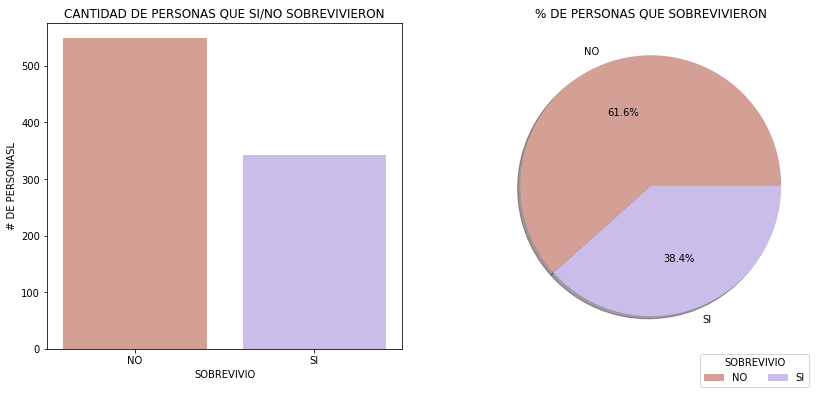

In [22]:
fig, ax = plt.subplots(1, 2,figsize=(14, 6)) # Igual intervalos en las variables
# colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','#CABDE9', '#D4A096']
colors = ['#D4A096', '#CABDE9']
cat_sobrevivio = ['NO','SI']

ax[0].bar(cat_sobrevivio, agrupacion_sobrevivientes.values, color=colors)
ax[0].set_title("CANTIDAD DE PERSONAS QUE SI/NO SOBREVIVIERON")
ax[0].set_ylabel("# DE PERSONASL")
ax[0].set_xlabel("SOBREVIVIO")

ax[1].pie(agrupacion_sobrevivientes, autopct='%.1f%%',labels=cat_sobrevivio,shadow=True,colors=colors)
ax[1].legend(title="SOBREVIVIO",bbox_to_anchor =(1, 0), ncol = 2 ) # loc ="lower left" "center right"
ax[1].set_title("% DE PERSONAS QUE SOBREVIVIERON")

plt.show()

### VARIABLE "Clase"

 TABLA DE SOBREVIVENCIA VS CLASE
 ------------------


,1-Alto,2-Medio,3-Bajo,Total
No Sobrevivio,80,97,372,549
Sobrevivio,136,87,119,342
Total,216,184,491,891


 

 TABLA DE SOBREVIVENCIA VS CLASE VS GENERO
 ------------------


Genero        female          male            All
Clase              1   2    3    1    2    3     
No Sobrevivio      3   6   72   77   91  300  549
Sobrevivio        91  70   72   45   17   47  342
Total             94  76  144  122  108  347  891



 -------------------------------


,TASA DE SUPERVIVENCIA,CANTIDAD DE SOBREVIVIENTES
1-Alto,62.962963,136.0
2-Medio,47.282609,87.0
3-Bajo,24.236253,119.0


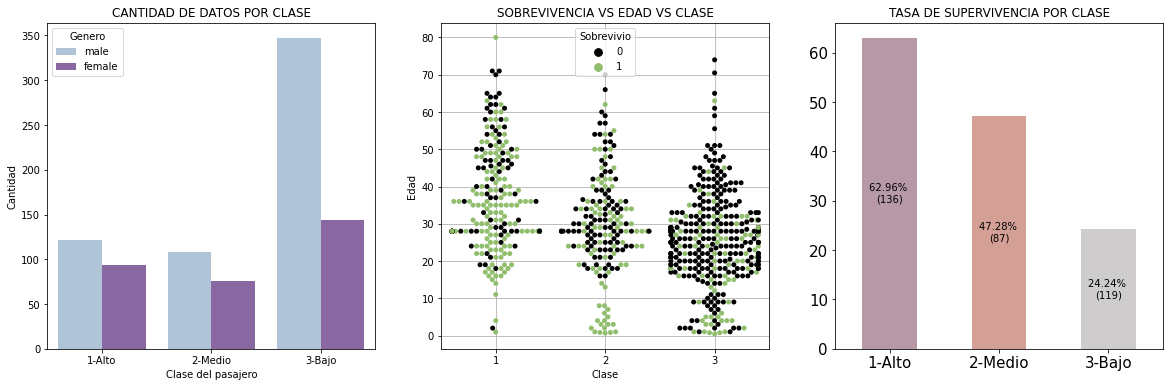

In [23]:
fig, ax = plt.subplots(figsize=(20,6))
cat_clase=["1-Alto","2-Medio","3-Bajo"] 
cat_color=["#B698A7","#D4A096","#CECCCC"]
hue_colors = {"male": "#CECCCC", 
              "female": "#feeafa"}
# cat_sobrevivio = ['NO','SI']

print(" TABLA DE SOBREVIVENCIA VS CLASE")
print(" ------------------")
survived_sex = pd.crosstab(index = titanic['Sobrevivio'],
                          columns = [titanic['Clase']],
                          margins=True)
survived_sex.index = ['No Sobrevivio', 'Sobrevivio','Total']
survived_sex.columns = ["1-Alto","2-Medio","3-Bajo", 'Total']
display(survived_sex)
print(" \n")

print(" TABLA DE SOBREVIVENCIA VS CLASE VS GENERO")
print(" ------------------")
surv_sex_class = pd.crosstab(index = titanic['Sobrevivio'],
                            columns = [titanic['Genero'],titanic['Clase']],
                            margins = True)
surv_sex_class.index = ['No Sobrevivio', 'Sobrevivio','Total']
display(surv_sex_class)
print("\n")

# TASE DE SUPERVIVENCIA POR CLASE 1,2,3
print(" -------------------------------")
Total_x_sobrevivientes = survived_sex.loc['Sobrevivio']
Total_x_clase = survived_sex.loc['Total']
tasa_supervivencia_clase = (Total_x_sobrevivientes/Total_x_clase)*100
# Convertir la SERIE A DATAFRAME
# display(tasa_supervivencia_clase.to_frame(name='0'))
df_tasa = pd.DataFrame(tasa_supervivencia_clase)
df_tasa.columns = ["TASA DE SUPERVIVENCIA"]
df_tasa["CANTIDAD DE SOBREVIVIENTES"] = Total_x_sobrevivientes[0:3]
display(df_tasa[0:3])
print(" \n")

plt.subplot(131)

s_plot = sns.countplot(x="Clase",hue="Genero", data= titanic,palette='BuPu')
s_plot.set_xlabel("Clase del pasajero")
s_plot.set_ylabel("Cantidad")
s_plot.set_title("CANTIDAD DE DATOS POR CLASE")
s_plot.set_xticklabels(cat_clase, rotation=0)

plt.subplot(132)
colors = ['#CABDE9', '#D4A096']
sns.swarmplot(x='Clase',y='Edad',hue="Sobrevivio", data=titanic, palette=['black','#90be6d']); # palette= 'BuPu' dodge=True
plt.title("SOBREVIVENCIA VS EDAD VS CLASE")
plt.grid(True)



plt.subplot(133)

group_sum =tasa_supervivencia_clase[0:3]
ax = group_sum.plot.bar(stacked=True, color=cat_color) #figsize=(15, 7),
ax.set_title('TASA DE SUPERVIVENCIA POR CLASE')  # Titulo de la grafica #fontsize=25
ax.tick_params(axis="x", rotation=0, labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.grid(False)

abs_values = Total_x_sobrevivientes[0:3]
rel_values = tasa_supervivencia_clase[0:3]
labels = zip(abs_values, rel_values)

for path in ax.patches:
    abs_value, rel_value = next(labels)
    label = f"{rel_value:.2f}% \n({abs_value})"
    width, height = path.get_width(), path.get_height()
    x, y = path.get_xy() 
    ax.text(x=x + width / 2, 
            y=y + height / 2, 
            s=label,
            horizontalalignment='center', 
            verticalalignment='center'
            )

# -- OBSERVACIONES
# 136*100/342 = 39.77 % de sobrevivir si pertenezco a la clase ALTA
# 25.44 % de sobrevivir si pertenezco a la clase MEDIA
# 34.80% de sobrevivir si pertenezco a la clase BAJA
# 
# 300*100/549 = 54.64
# El 54% de las personas fallecidas fueron hombres con tiquet de clase baja
# Se observa una ligera diferencia entre las mujeres sobrevivientes mujeres de clase baja,media y baja

# 1ra clase: Aristócratas, buena posición social (incluso algunos tenían títulos de la nobleza o de la familia real), multimillonarios
# 2da clase: Profesionistas, aquí viajaban los abogados, maestros, (personas que ya tenían un titulo universitario)
# 3ra clase: Aquí viajaban algunos sirvientes de la 1ra clase, personas que iban a USA en busca del "sueño americano"

Text(0.5, 1.0, 'SOBREVIVENCIA VS EDAD VS CLASE')

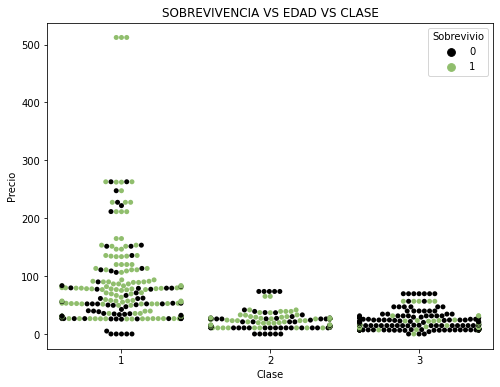

In [24]:
fig, ax = plt.subplots(figsize=(8,6))
sns.swarmplot(x='Clase',y='Precio',hue="Sobrevivio", data=titanic, palette=['black','#90be6d']); # palette= 'BuPu' dodge=True
plt.title("SOBREVIVENCIA VS EDAD VS CLASE")

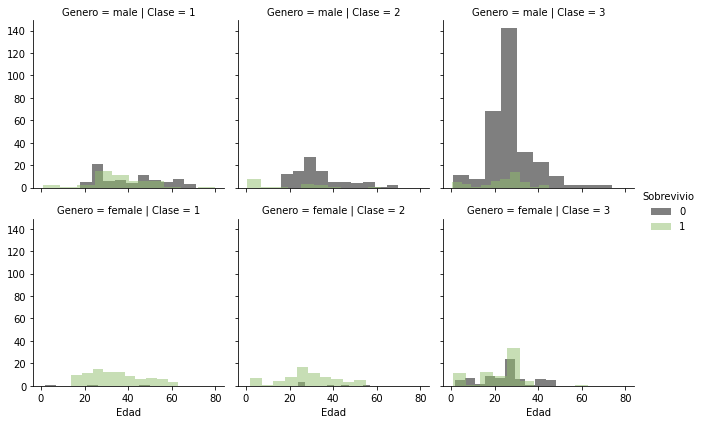

In [25]:
cat_color=["black","#90be6d"] #'RdBu'
h = sns.FacetGrid(titanic, row = 'Genero', col = 'Clase', hue = 'Sobrevivio',palette=cat_color)
h.map(plt.hist, 'Edad', alpha = .5)
h.add_legend()

### VARIABLE "Genero"

 TABLA DE SOBREVIVENCIA VS GENERO
 ------------------


,Mujer,Hombre,Total
No Sobrevivio,81,468,549
Sobrevivio,233,109,342
Total,314,577,891


 

 TABLA DE SOBREVIVENCIA VS EMBARQUE VS GENERO
 ------------------


Genero        female          male           All
Embarque           C   Q    S    C   Q    S     
No Sobrevivio      9   9   63   66  38  364  549
Sobrevivio        64  27  142   29   3   77  342
Total             73  36  205   95  41  441  891

 

 -------------------------------


,TASA DE SUPERVIVENCIA,CANTIDAD DE SOBREVIVIENTES
Mujer,74.203822,233.0
Hombre,18.890815,109.0


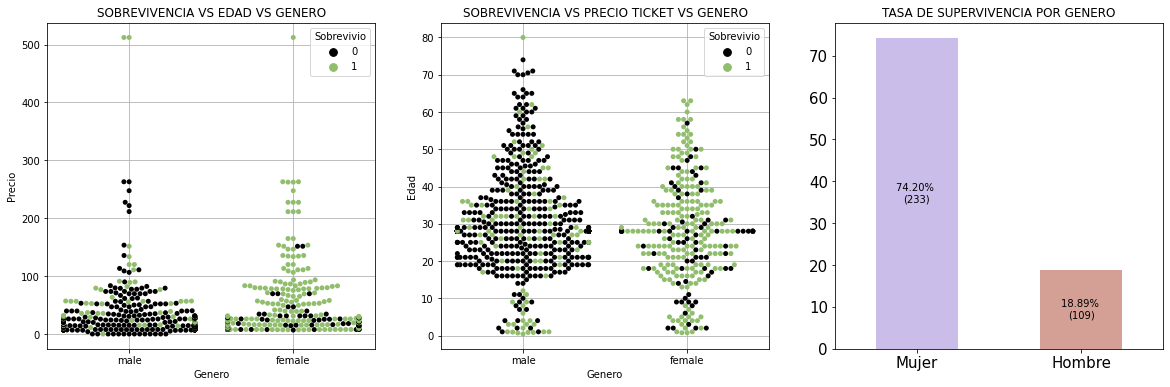

In [27]:
fig, ax = plt.subplots(figsize=(20,6))
cat_clase=["1-Alto","2-Medio","3-Bajo"] 
cat_color=["#98c1d9","#f5cac3"]

# -------------------------- TABLAS INCIO -----------------------------
print(" TABLA DE SOBREVIVENCIA VS GENERO")
print(" ------------------")
survived_sex = pd.crosstab(index = titanic['Sobrevivio'],
                          columns = [titanic['Genero']],
                          margins=True)
survived_sex.index = ['No Sobrevivio', 'Sobrevivio','Total']
survived_sex.columns = ['Mujer', 'Hombre', 'Total']
display(survived_sex)
print(" \n")

print(" TABLA DE SOBREVIVENCIA VS EMBARQUE VS GENERO")
print(" ------------------")
surv_sex_class = pd.crosstab(index = titanic['Sobrevivio'],
                            columns = [titanic['Genero'],titanic['Embarque']],
                            margins = True)
surv_sex_class.index = ['No Sobrevivio', 'Sobrevivio','Total']
display(surv_sex_class)
print(" \n")

# TASE DE SUPERVIVENCIA POR GENERO
print(" -------------------------------")
Total_x_sobrevivientes = survived_sex.loc['Sobrevivio']
Total_x_genero = survived_sex.loc['Total']
tasa_supervivencia_genero = (Total_x_sobrevivientes/Total_x_genero)*100

# Convertir la SERIE A DATAFRAME
# display(tasa_supervivencia_clase.to_frame(name='0'))
df_tasa = pd.DataFrame(tasa_supervivencia_genero)

df_tasa.columns = ["TASA DE SUPERVIVENCIA"]
df_tasa["CANTIDAD DE SOBREVIVIENTES"] = Total_x_sobrevivientes[0:2]
display(df_tasa[0:2])
print(" \n")

# -------------------------- TABLAS FIN -----------------------------



plt.subplot(131)
colors = ['#CABDE9', '#D4A096']
sns.swarmplot(x='Genero',y='Precio',hue="Sobrevivio", data=titanic, palette=['black','#90be6d']); # palette= 'BuPu' dodge=True
plt.title("SOBREVIVENCIA VS EDAD VS GENERO")
plt.grid(True)

# s_plot=sns.violinplot(data=titanic,
#          x='Precio',
#          y='Genero',
#          hue = 'Sobrevivio',
#          palette='husl',figsize=(3,3))
# plt.clf()

plt.subplot(132)
colors = ['#CABDE9', '#D4A096']
sns.swarmplot(x='Genero',y='Edad',hue="Sobrevivio", data=titanic, palette=['black','#90be6d']); # palette= 'BuPu' dodge=True
plt.title("SOBREVIVENCIA VS PRECIO TICKET VS GENERO")
plt.grid(True)

plt.subplot(133)
# colors = ['#CABDE9', '#D4A096']
# titanic['Genero'].value_counts().plot(kind='pie',legend=True, colors=cat_color,autopct='%.1f%%',);
# plt.title("% DE DATOS POR GENERO")
# plt.legend(title="GENERO",bbox_to_anchor =(0.9, 0.9), ncol = 2 )
# plt.grid(True)

group_sum =tasa_supervivencia_genero[0:2]
ax = group_sum.plot.bar(stacked=True, color=colors) #figsize=(15, 7),
ax.set_title('TASA DE SUPERVIVENCIA POR GENERO')  # Titulo de la grafica #fontsize=25
ax.tick_params(axis="x", rotation=0, labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.grid(False)

abs_values = Total_x_sobrevivientes[0:2]
rel_values = tasa_supervivencia_genero[0:2]
labels = zip(abs_values, rel_values)

for path in ax.patches:
    abs_value, rel_value = next(labels)
    label = f"{rel_value:.2f}% \n({abs_value})"
    width, height = path.get_width(), path.get_height()
    x, y = path.get_xy() 
    ax.text(x=x + width / 2, 
            y=y + height / 2, 
            s=label,
            horizontalalignment='center', 
            verticalalignment='center'
            )



# -- OBSERVACIONES
# 233*100/342 = 68.13 % de sobrevivir si soy mujer
# 32.87 % de sobrevivir si soy hombre
# El precio del ticket no influyo a la hora de salvar a las personas

# AVERIGUAR PORQUE EL EMBARQUE "S" TIENE MAYOR TASA DE SUPERVIVENCIA !!!

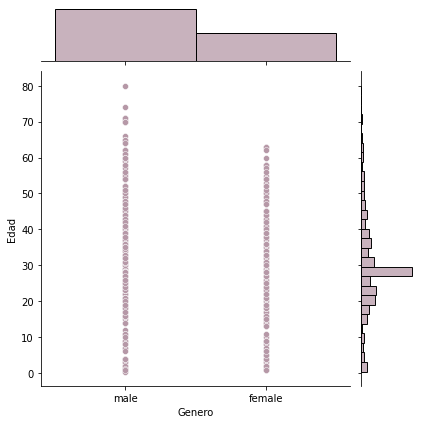

In [28]:
j=sns.jointplot(x='Genero',y='Edad',data=titanic,kind='scatter',color="#B698A7");

### VARIABLE "Embarque"

 TABLA DE SOBREVIVENCIA VS GENERO
 ------------------


,C-Cherb.,Q-Queen.,S-South,Total
No Sobrevivio,75,47,427,549
Sobrevivio,93,30,219,342
Total,168,77,646,891


 

 -------------------------------


,TASA DE SUPERVIVENCIA,CANTIDAD DE SOBREVIVIENTES
C-Cherb.,55.357143,93.0
Q-Queen.,38.961039,30.0
S-South,33.900929,219.0


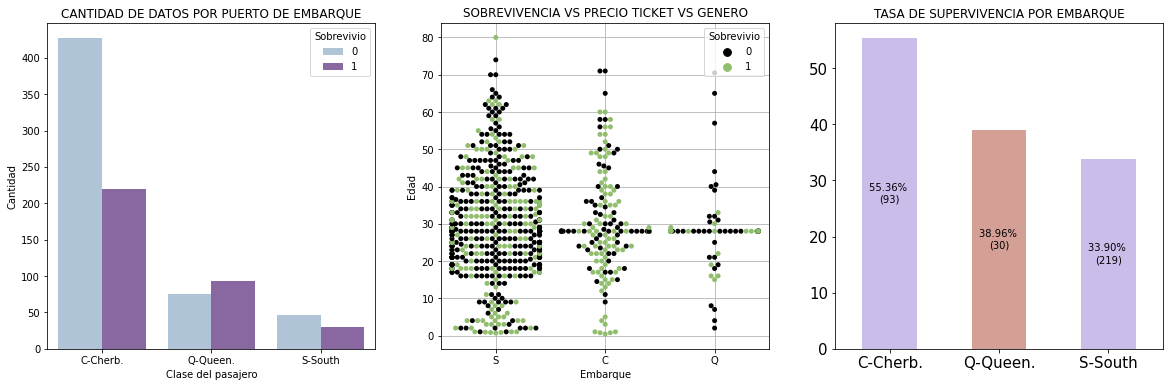

In [30]:
fig, ax = plt.subplots(figsize=(20,6))
cat_clase=["C-Cherb.","Q-Queen.","S-South"] 
color_embarque=["#B698A7","#D4A096","#CECCCC"]


# -------------------------- TABLAS INCIO -----------------------------
print(" TABLA DE SOBREVIVENCIA VS GENERO")
print(" ------------------")
surv_Embar_class = pd.crosstab(index = titanic['Sobrevivio'],
                            columns = [titanic['Embarque']],
                            margins = True)
surv_Embar_class.index = ['No Sobrevivio', 'Sobrevivio','Total']
surv_Embar_class.columns = ["C-Cherb.","Q-Queen.","S-South",'Total']
display(surv_Embar_class)
print(" \n")

# TASE DE SUPERVIVENCIA POR EMBARQUE
print(" -------------------------------")
Total_x_sobrevivientes = surv_Embar_class.loc['Sobrevivio']
Total_x_embarque = surv_Embar_class.loc['Total']
tasa_supervivencia_embarque = (Total_x_sobrevivientes/Total_x_embarque)*100

# Convertir la SERIE A DATAFRAME
# display(tasa_supervivencia_clase.to_frame(name='0'))
df_tasa = pd.DataFrame(tasa_supervivencia_embarque)

df_tasa.columns = ["TASA DE SUPERVIVENCIA"]
df_tasa["CANTIDAD DE SOBREVIVIENTES"] = Total_x_sobrevivientes[0:3]
display(df_tasa[0:3])
print(" \n")

# -------------------------- TABLAS FIN -------------------------------

plt.subplot(131)
s_plot = sns.countplot(x="Embarque",hue="Sobrevivio", data= titanic,palette='BuPu')
s_plot.set_xlabel("Clase del pasajero")
s_plot.set_ylabel("Cantidad")
s_plot.set_title("CANTIDAD DE DATOS POR PUERTO DE EMBARQUE")
s_plot.set_xticklabels(cat_clase, rotation=0)

plt.subplot(132)
sns.swarmplot(x='Embarque',y='Edad',hue="Sobrevivio", data=titanic, palette=['black','#90be6d']); # palette= 'BuPu' dodge=True
plt.title("SOBREVIVENCIA VS PRECIO TICKET VS GENERO")
plt.grid(True)

plt.subplot(133)
# colors = ['#CABDE9', '#D4A096']
# titanic['Embarque'].value_counts().plot(kind='pie',legend=True, colors=color_embarque,autopct='%.1f%%',);
# plt.title("% DE DATOS POR GENERO")
# plt.legend(title="GENERO",bbox_to_anchor =(0.9, 0.9), ncol = 2 )
# plt.grid(True)
group_sum =tasa_supervivencia_embarque[0:3]
ax = group_sum.plot.bar(stacked=True, color=colors) #figsize=(15, 7),
ax.set_title('TASA DE SUPERVIVENCIA POR EMBARQUE')  # Titulo de la grafica #fontsize=25
ax.tick_params(axis="x", rotation=0, labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.grid(False)

abs_values = Total_x_sobrevivientes[0:3]
rel_values = tasa_supervivencia_embarque[0:3]
labels = zip(abs_values, rel_values)

for path in ax.patches:
    abs_value, rel_value = next(labels)
    label = f"{rel_value:.2f}% \n({abs_value})"
    width, height = path.get_width(), path.get_height()
    x, y = path.get_xy() 
    ax.text(x=x + width / 2, 
            y=y + height / 2, 
            s=label,
            horizontalalignment='center', 
            verticalalignment='center'
            )



# -- OBSERVACIONES
# La tasa de supervivencia de cada embarque es de :
# C = 55.35%
# Q = 38.96%
# s = 33.90%

# Como se puede observar el embarque C fue el que mayor tasa de supervivencia tuvo


SOBREVIVENCIA VS EMBARQUE VS GENERO
------------------------------------


Genero        female          male           All
Embarque           C   Q    S    C   Q    S     
No Sobrevivio      9   9   63   66  38  364  549
Sobrevivio        64  27  142   29   3   77  342
Total             73  36  205   95  41  441  891



TASA DE SUPERVIVENCIA EMBARQUE VS GENERO
------------------------------------


,tasa_mujer,tasa_hombre
C-Cherb.,87.671233,30.526316
Q-Queen.,75.000000,7.317073
S-South.,69.268293,17.460317


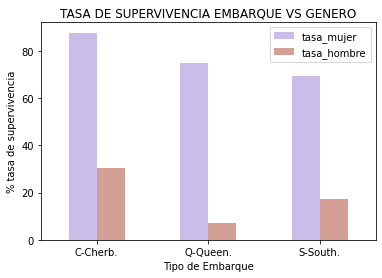

In [ ]:
# Tasa de supervivencia segun el embarque por genero

# Tabla
print("SOBREVIVENCIA VS EMBARQUE VS GENERO")
print("------------------------------------")
display(surv_sex_class)
print("\n")

sobreviviente_mujer= surv_sex_class.iloc[1:2,0:3]
sobreviviente_hombre= surv_sex_class.iloc[1:2,3:6]
sobreviviente_total_mujeres = surv_sex_class.iloc[2:3,0:3]
sobreviviente_total_hombres = surv_sex_class.iloc[2:3,3:6]
sobreviviente_total_hombres
tasa_mujer = (sobreviviente_mujer.values/sobreviviente_total_mujeres.values)*100
tasa_hombre = (sobreviviente_hombre.values/sobreviviente_total_hombres.values)*100

tasa_mujer = tasa_mujer[0]
tasa_hombre = tasa_hombre[0]
index = ['C-Cherb.', 'Q-Queen.', 'S-South.']
df_tasa_embarque_genero = pd.DataFrame({'tasa_mujer': tasa_mujer,
                   'tasa_hombre': tasa_hombre}, index=index)

print("TASA DE SUPERVIVENCIA EMBARQUE VS GENERO")
print("------------------------------------")
display(df_tasa_embarque_genero)
print("\n")
ax = df_tasa_embarque_genero.plot.bar(rot=0, color=colors)

ax.set_xlabel("Tipo de Embarque");
ax.set_ylabel("% tasa de supervivencia");
ax.set_title("TASA DE SUPERVIVENCIA EMBARQUE VS GENERO");

### VARIABLE "Edad", "Precio", "PadresHijos" Y "HermEsp"

 TABLA DE SOBREVIVENCIA VS INTERVALO DE EDAD
 ------------------


,<=15,15<x<=30,30<x<=45,45<x<=65,>65,TOTAL
No Sobrevivio,34,334,116,58,7,549
Sobrevivio,49,169,86,37,1,342
Total,83,503,202,95,8,891


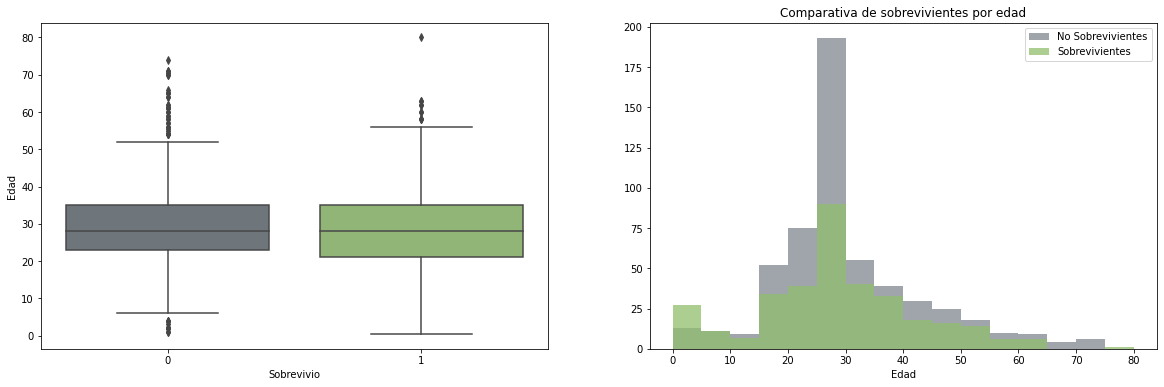

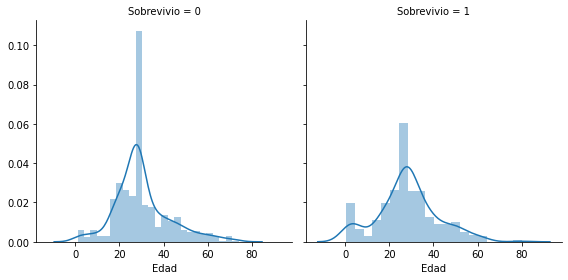

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
color_sobrevivio = ['#6c757d','#90be6d'] # Plomo - Verde  adb5bd

# 1ER GRAFICO
plt.subplot(121)
s_plot = sns.boxplot(x="Sobrevivio", y="Edad", data=titanic, palette=color_sobrevivio) # palette="Set3"

# 2DO GRAFICO
plt.subplot(122)
not_survived = titanic.Edad[titanic.Sobrevivio == 0]
not_survived.hist(bins = np.arange(0,81,5),label = 'No Sobrevivientes', color = color_sobrevivio[0], alpha = 0.65)
survived = titanic.Edad[titanic.Sobrevivio == 1]
survived.hist(bins = np.arange(0,81,5),label = 'Sobrevivientes', color = color_sobrevivio[1],alpha = 0.75)
plt.title("Comparativa de sobrevivientes por edad")
plt.xlabel('Edad')
plt.legend()
plt.grid(False)

# 3ER GRAFICO
g = sns.FacetGrid(titanic, col='Sobrevivio',size=4)
g = g.map(sns.distplot, "Edad")

# CREANDO UNA NUEVA COLUMNA PARA CATEGORIZAR LA EDAD
titanic['Edad_intervalo']=-100
titanic.loc[titanic['Edad']<=15,'Edad_intervalo']=0
titanic.loc[(titanic['Edad']>15)&(titanic['Edad']<=30),'Edad_intervalo']=1
titanic.loc[(titanic['Edad']>30)&(titanic['Edad']<=45),'Edad_intervalo']=2
titanic.loc[(titanic['Edad']>45)&(titanic['Edad']<=65),'Edad_intervalo']=3
titanic.loc[titanic['Edad']>65,'Edad_intervalo']=4
# display(titanic['Edad_intervalo'].value_counts().to_frame())

print(" TABLA DE SOBREVIVENCIA VS INTERVALO DE EDAD")
print(" ------------------")
survived_edad_intervalo = pd.crosstab(index = titanic['Sobrevivio'],
                          columns = [titanic['Edad_intervalo']],
                          margins=True)
survived_edad_intervalo.index = ['No Sobrevivio', 'Sobrevivio','Total']
survived_edad_intervalo.columns = ["<=15","15<x<=30","30<x<=45", '45<x<=65','>65','TOTAL']
display(survived_edad_intervalo)
print(" \n")

# -- OBSERVACIONES
# El 74% de las personas que sobrevivieron tenian entre 15 y 45 años
# El 56% de las personas en el barco tenian entre 15 y 30 años
# El 22% de las personas en el barco tenian entre 45 y 65 años

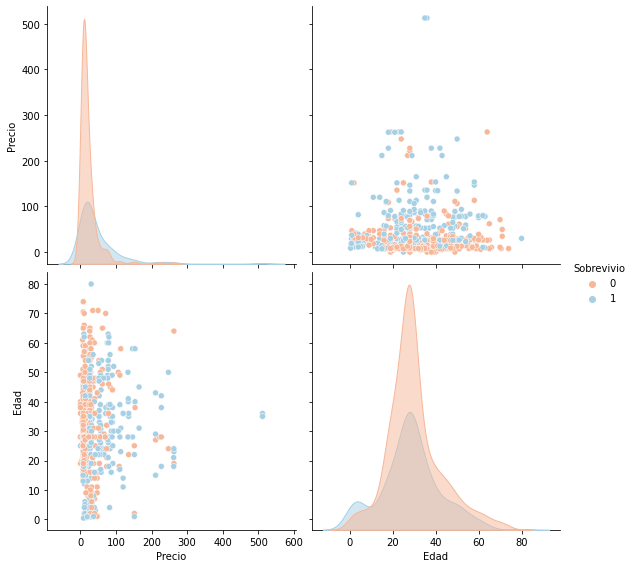

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.pairplot(data=titanic,
        vars=["Precio", "Edad"],
        kind='scatter',
        hue='Sobrevivio',
        palette='RdBu',
        diag_kws={'alpha':.5},
        size=4)
plt.show()
plt.clf()

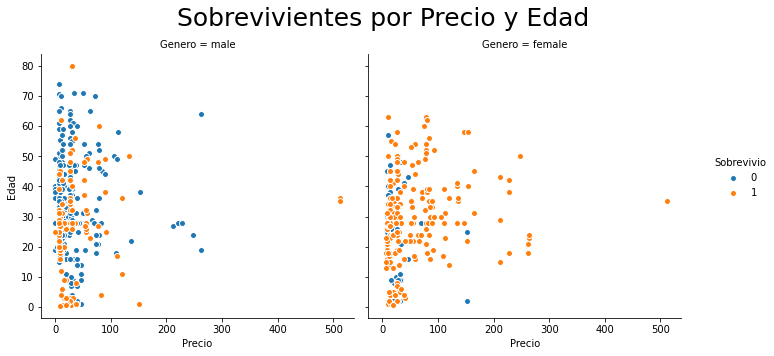

In [ ]:
g = sns.FacetGrid(titanic, size=5,hue="Sobrevivio", col ="Genero", margin_titles=True)
g.map(plt.scatter, "Precio", "Edad",edgecolor="w").add_legend()
g.fig.suptitle("Sobrevivientes por Precio y Edad", size = 25)
plt.subplots_adjust(top=0.85)

# Si el hombre pagaba mas por su ticket en el Titanic igual va a morir :3 :v

Text(0.5, 1.0, 'Precio del tickete del pasajero')

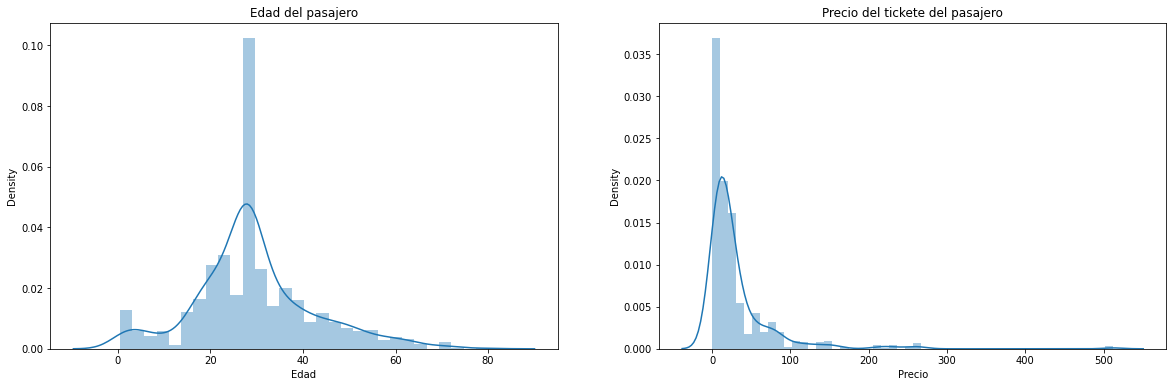

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))

# 1ER GRAFICO
plt.subplot(121)
sns.distplot(titanic['Edad']).set_title('Edad del pasajero')

# 2DO GRAFICO
plt.subplot(122)
sns.distplot(titanic['Precio'])
plt.title("Precio del tickete del pasajero")

 TABLA DE SOBREVIVENCIA VS INTERVALO DE PRECIO (LIBRAS)
 ------------------


,<=10,10<x<=20,20<x<=30,30<x<=40,>40,TOTAL
No Sobrevivio,269,103,79,35,63,549
Sobrevivio,67,76,63,23,113,342
Total,336,179,142,58,176,891


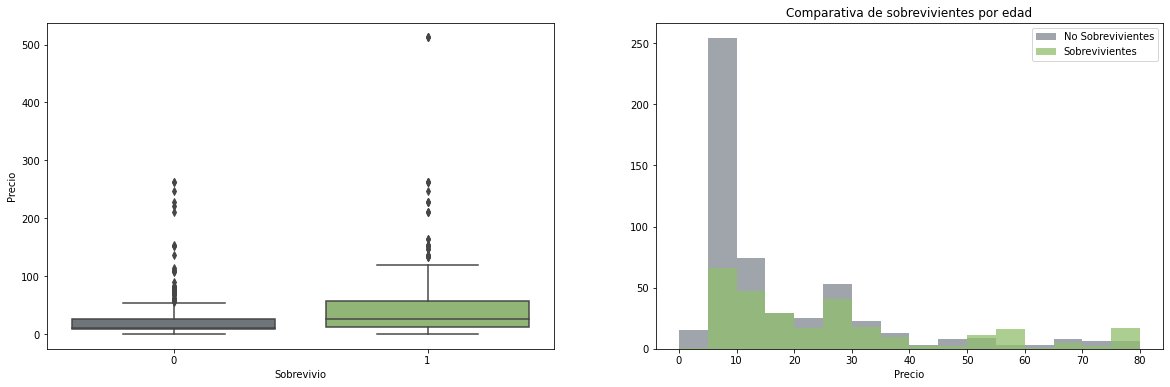

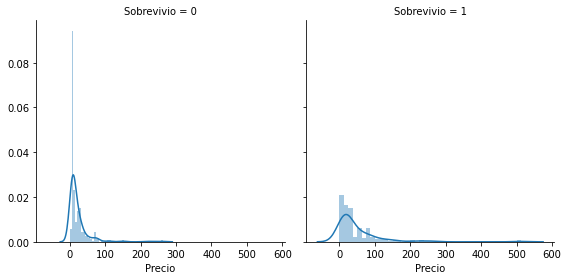

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
color_sobrevivio = ['#6c757d','#90be6d'] # Plomo - Verde  adb5bd

# 1ER GRAFICO
plt.subplot(121)
s_plot = sns.boxplot(x="Sobrevivio", y="Precio", data=titanic, palette=color_sobrevivio) # palette="Set3"

# 2DO GRAFICO
plt.subplot(122)
not_survived = titanic.Precio[titanic.Sobrevivio == 0]
not_survived.hist(bins = np.arange(0,81,5),label = 'No Sobrevivientes', color = color_sobrevivio[0], alpha = 0.65)
survived = titanic.Precio[titanic.Sobrevivio == 1]
survived.hist(bins = np.arange(0,81,5),label = 'Sobrevivientes', color = color_sobrevivio[1],alpha = 0.75)
plt.title("Comparativa de sobrevivientes por edad")
plt.xlabel('Precio')
plt.legend()
plt.grid(False)

# 3ER GRAFICO
g = sns.FacetGrid(titanic, col='Sobrevivio',size=4)
g = g.map(sns.distplot, "Precio")

# CREANDO UNA NUEVA COLUMNA PARA CATEGORIZAR LA PRECIO
titanic['Precio_intervalo']=-100
titanic.loc[titanic['Precio']<=10,'Precio_intervalo']=0
titanic.loc[(titanic['Precio']>10)&(titanic['Precio']<=20),'Precio_intervalo']=1
titanic.loc[(titanic['Precio']>20)&(titanic['Precio']<=30),'Precio_intervalo']=2
titanic.loc[(titanic['Precio']>30)&(titanic['Precio']<=40),'Precio_intervalo']=3
titanic.loc[titanic['Precio']>40,'Precio_intervalo']=4
# display(titanic['Precio_intervalo'].value_counts().to_frame())

print(" TABLA DE SOBREVIVENCIA VS INTERVALO DE PRECIO (LIBRAS)")
print(" ------------------")
survived_precio_intervalo = pd.crosstab(index = titanic['Sobrevivio'],
                          columns = [titanic['Precio_intervalo']],
                          margins=True)
survived_precio_intervalo.index = ['No Sobrevivio', 'Sobrevivio','Total']
survived_precio_intervalo.columns = ["<=10","10<x<=20","20<x<=30", '30<x<=40','>40','TOTAL']
display(survived_precio_intervalo)
print(" \n")

 TABLA DE SOBREVIVENCIA VS # de PADRE E HIJOS
 ------------------


PadresHijos,0,1,2,3,4,5,6,All
No Sobrevivio,445,53,40,2,4,4,1,549
Sobrevivio,233,65,40,3,0,1,0,342
Total,678,118,80,5,4,5,1,891


 

 TABLA DE SOBREVIVENCIA VS # DE HERMANOS Y ESPOS@
 ------------------


HermEsp,0,1,2,3,4,5,8,All
No Sobrevivio,398,97,15,12,15,5,7,549
Sobrevivio,210,112,13,4,3,0,0,342
Total,608,209,28,16,18,5,7,891


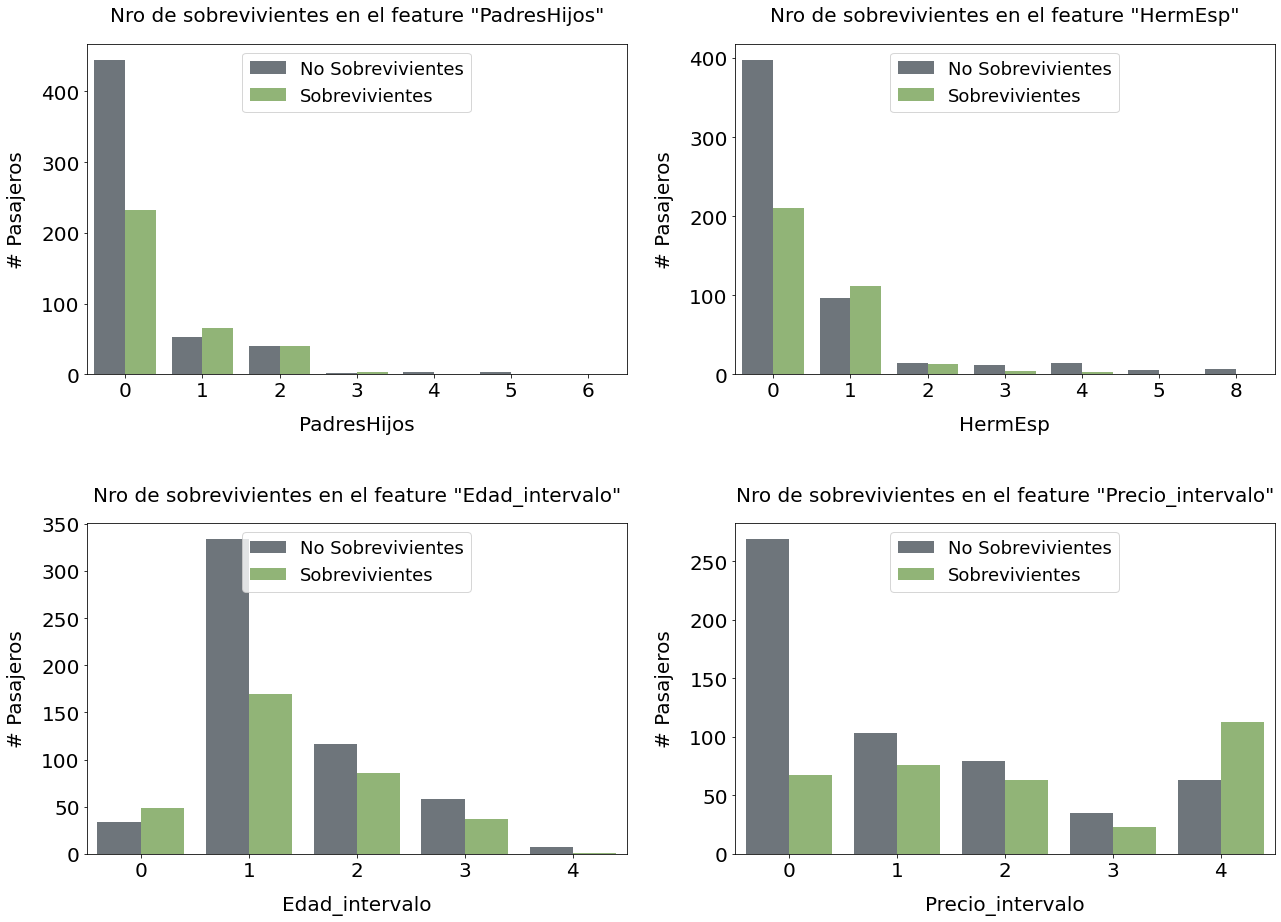

,<=15,15<x<=30,30<x<=45,45<x<=65,>65,TOTAL
No Sobrevivio,34,334,116,58,7,549
Sobrevivio,49,169,86,37,1,342
Total,83,503,202,95,8,891


,<=10,10<x<=20,20<x<=30,30<x<=40,>40,TOTAL
No Sobrevivio,269,103,79,35,63,549
Sobrevivio,67,76,63,23,113,342
Total,336,179,142,58,176,891


In [ ]:
cat_features = ['PadresHijos', 'HermEsp', 'Edad_intervalo', 'Precio_intervalo']
color_sobrevivio = ['#6c757d','#90be6d'] # Plomo - Verde  adb5bd

print(" TABLA DE SOBREVIVENCIA VS # de PADRE E HIJOS")
print(" ------------------")
survived_sex = pd.crosstab(index = titanic['Sobrevivio'],
                          columns = [titanic['PadresHijos']],
                          margins=True)
survived_sex.index = ['No Sobrevivio', 'Sobrevivio','Total']
display(survived_sex)
print(" \n")

print(" TABLA DE SOBREVIVENCIA VS # DE HERMANOS Y ESPOS@")
print(" ------------------")
survived_sex = pd.crosstab(index = titanic['Sobrevivio'],
                          columns = [titanic['HermEsp']],
                          margins=True)
survived_sex.index = ['No Sobrevivio', 'Sobrevivio','Total']
display(survived_sex)
print(" \n")

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 10))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):    
    plt.subplot(2, 2, i)
    fig.subplots_adjust(hspace = 0.45)
    
    sns.countplot(x=feature, hue='Sobrevivio', data=titanic, palette=color_sobrevivio)
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('# Pasajeros', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['No Sobrevivientes', 'Sobrevivientes'], loc='upper center', prop={'size': 18})
    plt.title('Nro de sobrevivientes en el feature "{}"'.format(feature), size=20, y=1.05)
plt.show()

display(survived_edad_intervalo)
print(" \n")
display(survived_precio_intervalo)


 -------------------------------


,TASA DE SUPERVIVENCIA X INTERVALO DE EDAD,CANTIDAD DE SOBREVIVIENTES,TOTAL POR INTERVALO
<=15,59.036145,49.0,83.0
15<x<=30,33.598410,169.0,503.0
30<x<=45,42.574257,86.0,202.0
45<x<=65,38.947368,37.0,95.0
>65,12.500000,1.0,8.0


 

 -------------------------------


,TASA DE SUPERVIVENCIA X INTERVALO DE PRECIO,CANTIDAD DE SOBREVIVIENTES,TOTAL POR INTERVALO
<=10,19.940476,67.0,336.0
10<x<=20,42.458101,76.0,179.0
20<x<=30,44.366197,63.0,142.0
30<x<=40,39.655172,23.0,58.0
>40,64.204545,113.0,176.0


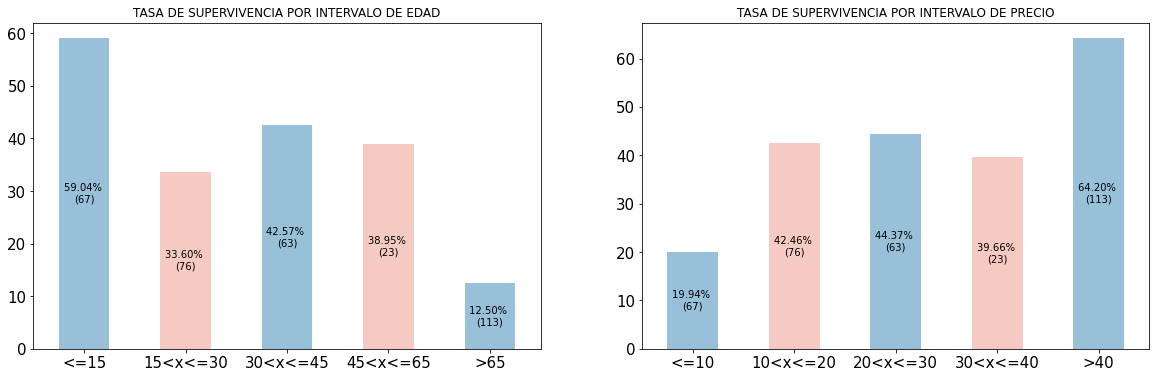

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))

# TASE DE SUPERVIVENCIA POR INTERVALOS DE EDAD
print(" -------------------------------")
Total_x_sobrevivientes = survived_edad_intervalo.loc['Sobrevivio']
Total_x_intervaloEdad = survived_edad_intervalo.loc['Total']
tasa_supervivencia_intervaloEdad = (Total_x_sobrevivientes/Total_x_intervaloEdad)*100
df_tasa = pd.DataFrame(tasa_supervivencia_intervaloEdad)

df_tasa.columns = ["TASA DE SUPERVIVENCIA X INTERVALO DE EDAD"]
df_tasa["CANTIDAD DE SOBREVIVIENTES"] = Total_x_sobrevivientes[0:5]
df_tasa["TOTAL POR INTERVALO"] = Total_x_intervaloEdad[0:5]
display(df_tasa[0:5])
print(" \n")

# TASE DE SUPERVIVENCIA POR INTERVALOS DE PRECIO
print(" -------------------------------")
Total_x_sobrevivientes = survived_precio_intervalo.loc['Sobrevivio']
Total_x_intervaloPrecio = survived_precio_intervalo.loc['Total']
tasa_supervivencia_intervaloPrecio = (Total_x_sobrevivientes/Total_x_intervaloPrecio)*100
df_tasa = pd.DataFrame(tasa_supervivencia_intervaloPrecio)

df_tasa.columns = ["TASA DE SUPERVIVENCIA X INTERVALO DE PRECIO"]
df_tasa["CANTIDAD DE SOBREVIVIENTES"] = Total_x_sobrevivientes[0:5]
df_tasa["TOTAL POR INTERVALO"] = Total_x_intervaloPrecio[0:5]
display(df_tasa[0:5])
print(" \n")

plt.subplot(121)
group_sum =tasa_supervivencia_intervaloEdad[0:5]
ax = group_sum.plot.bar(stacked=True, color=cat_color) #figsize=(15, 7),
ax.set_title('TASA DE SUPERVIVENCIA POR INTERVALO DE EDAD')  # Titulo de la grafica #fontsize=25
ax.tick_params(axis="x", rotation=0, labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.grid(False)

abs_values = Total_x_sobrevivientes[0:5]
rel_values = tasa_supervivencia_intervaloEdad[0:5]
labels = zip(abs_values, rel_values)

for path in ax.patches:
    abs_value, rel_value = next(labels)
    label = f"{rel_value:.2f}% \n({abs_value})"
    width, height = path.get_width(), path.get_height()
    x, y = path.get_xy() 
    ax.text(x=x + width / 2, 
            y=y + height / 2, 
            s=label,
            horizontalalignment='center', 
            verticalalignment='center'
            )
    
plt.subplot(122)
group_sum =tasa_supervivencia_intervaloPrecio[0:5]
ax = group_sum.plot.bar(stacked=True, color=cat_color) #figsize=(15, 7),
ax.set_title('TASA DE SUPERVIVENCIA POR INTERVALO DE PRECIO')  # Titulo de la grafica #fontsize=25
ax.tick_params(axis="x", rotation=0, labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.grid(False)

abs_values = Total_x_sobrevivientes[0:5]
rel_values = tasa_supervivencia_intervaloPrecio[0:5]
labels = zip(abs_values, rel_values)

for path in ax.patches:
    abs_value, rel_value = next(labels)
    label = f"{rel_value:.2f}% \n({abs_value})"
    width, height = path.get_width(), path.get_height()
    x, y = path.get_xy() 
    ax.text(x=x + width / 2, 
            y=y + height / 2, 
            s=label,
            horizontalalignment='center', 
            verticalalignment='center'
            )

## **DATOS DE CULTURA GENERAL DEL SUCESO DEL TITANIC**

- Entre tripulación y pasajero iban 2223 personas
- Sobrevivieron 711 personas (214 tripulantes y 492 pasajeros)
- Solo se recuperaron 333 cuerpos
- Cada bote salvavidas tenía una capacidad de 65 personas.
- El barco tenia la capacidad de llevar 64 barcos pero solo se llevo 20 ( Se hubieran podido salvar 4.160 personas,casi el doble de las que estaban en el barco)
- Solo montaron 20 botes salvavidas (Se usaron 16 y no se llenaron en su totalidad)
- El tiempo transcurrido entre el avistamiento del iceberg y el impacto fue de 30 segundos. Luego de esto, se demoraron 60 minutos en lanzar el primer bote salvavidas. Entre la colisión y el hundimiento pasaron 2 horas con 40 minutos
- Los restos del Titanic están a 340 millas náuticas de la costa de Newfoundland (Canadá) y a 3800 m bajo el nivel de alta mar. Está bajo aguas internacionales, así que no pertenece a ningún país y está resguardado por la UNESCO
- En el Titanic iban viajando 11 perros y 3 sobrevivieron

**NOTA:**

**Se adjunta la tabla de los botes salvavidas donde se observara la capacidad y el contenido real de personas que abordaron.**

In [ ]:
evacuacion_titanic = pd.read_csv("https://raw.githubusercontent.com/MayumyCH/datasciencefem-datachallenge-monthly/main/titanic_machine_learning_from_disaster/data/Evacuaci%C3%B3n%20Titanic.csv")
evacuacion_titanic.head()

,Botes,Hora de lanzamiento al mar,Capacidad,Contenido Real,Lado,Personal de Asistencia,Hora de Recogida (RMS Carpathia)
0,Bote 1,1:05,40,12,Estribor,"Murdoch, Lowe\t",4:45
1,Bote 2,1:45,40,18,Babor,"Wilde, Smith",4:10
2,Bote 3,0:55,65,32,Estribor,"Murdoch, Lowe",7:30
3,Bote 4,1:50,65,30,Babor,Lightoller,8:00
4,Bote 5,0:43,65,35,Estribor,"Murdoch, Lowe, Pitman",6:00


In [ ]:
evacuacion_titanic.describe()

# -- OBSERVACIONES
#>> Contenido Real
# - Las minimas personas que abordaron el bote fue de 12 personas (18% de su capacidad)
# - Solo el 25% de los botes llevaron >= 40 personas
# - Se tiene como media del contenido real de los que abordaron el bote 35 personas (53 de su capacidad)

,Capacidad,Contenido Real
count,20.000000,20.000000
mean,58.900000,35.050000
std,9.738151,14.016813
min,40.000000,12.000000
25%,47.000000,27.000000
50%,65.000000,33.000000
75%,65.000000,40.000000
max,65.000000,65.000000


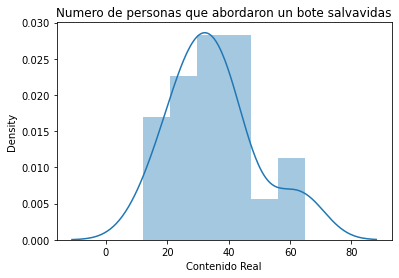

In [ ]:
sns.distplot(evacuacion_titanic['Contenido Real']).set_title('Numero de personas que abordaron un bote salvavidas');

# **TEAMS PARSEL 🐍 PRESENTE 🌟 !!**